In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 3.5 MB/s 
  Using cached pybind11-2.9.0-py2.py3-none-any.whl (210 kB)


In [ ]:
import sys
### Direct this path to the appropriate folder for importing libaries
sys.path.append('/content/drive/MyDrive/Newspaper Classification')

In [ ]:
import pandas as pd
import glob
from tqdm import tqdm
from Preprocessing import textpreprocess
import re
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score



#Load data

In [ ]:
finale_dataframe = pd.read_csv("/content/drive/MyDrive/Newspaper Classification/Data/version_2_26-11-2021.csv",encoding="utf8")

In [ ]:
finale_dataframe=finale_dataframe[~finale_dataframe['label'].str.contains("po")]
len(finale_dataframe)

200000

In [ ]:
def frameToFasttextTxt(frame,label,name):
    with open(name,"w") as f:
        for i in range(0,len(frame)):
            f.write("__label__"+str(label.iloc[i])+" "+str(frame["data"].iloc[i])+"\n")
        f.close()

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
                                                    finale_dataframe.drop("label", axis=1),
                                                    finale_dataframe["label"], 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify = finale_dataframe["label"]
                                                    )

X_valid, X_test, y_valid, y_test = train_test_split(
                                                    X_test,
                                                    y_test, 
                                                    test_size=0.5, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify = y_test
                                                    )

In [ ]:
frameToFasttextTxt(X_train,y_train,"train.txt")
frameToFasttextTxt(X_test,y_test,"test.txt")
frameToFasttextTxt(X_valid,y_valid,"valid.txt")

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())
print(y_valid.value_counts())


hp    32000
sp    32000
st    32000
ed    32000
ec    32000
Name: label, dtype: int64
sp    4000
st    4000
ec    4000
ed    4000
hp    4000
Name: label, dtype: int64
sp    4000
st    4000
ec    4000
ed    4000
hp    4000
Name: label, dtype: int64


In [ ]:
!head test.txt

__label__hp ảnh boldsky boldsky chỉ ra những tác_hại của việc mặc đồ lót quá chật ảnh_hưởng đến tinh_trùng mặc đồ lót quá chật khiến háng bị thắt chặt dẫn đến giảm số_lượng tinh_trùng gây ức_chế việc sản_xuất tinh_trùng cản_trở lưu_thông máu mặc quần_áo quá chật trong thời_gian dài sẽ làm cản_trở lưu_thông máu gây_tê liệt các dây_thần_kinh ở vùng kín nếu mô không nhận đủ oxy qua lưu_thông máu sẽ gây ra tình_trạng tế_bào chết viêm_nhiễm âm_đạo quần_lót chật cản_trở lưu_thông máu tới vùng âm_đạo gây kích_ứng và viêm_nhiễm biểu_hiện là ngứa râm_ran ở vùng kín ợ nóng quần_lót chật cạp cao bó chặt bụng và dạ_dày của bạn làm trào ngược axit lên thực_quản gây ợ nóng cản_trở lưu_thông không_khí khu_vực nhạy_cảm này rất cần không_khí để đảm_bảo vệ_sinh nếu mặc đồ lót quá bó sát không_khí không_thể lưu_thông mồ_hôi ra nhiều và gây viêm_nhiễm vùng kín ẩm_ướt là điều_kiện tốt cho vi_khuẩn tấn_công nhiễm_trùng đường tiết_niệu phụ_nữ mặc quần_lót chật rất dễ bị nhiễm_trùng đường tiết_niệu môi_trường

(array([ 6548.,  5225.,  6963., 13865., 19954., 19656., 16711., 13165.,
        10585.,  8443.,  6896.,  5581.,  4435.,  3804.,  3062.,  2678.,
         2149.,  1878.,  1411.,  1320.,  1003.,   853.,   632.,   561.,
          429.,   367.,   305.,   234.,   212.,   169.,   120.,   107.,
           91.,    76.,    53.,    44.,    49.,    23.,    28.]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
        1650, 1700, 1750, 1800, 1850, 1900, 1950]),
 <a list of 39 Patch objects>)

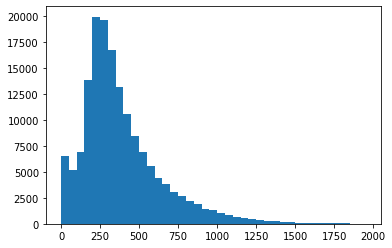

In [ ]:
lens = [len(x["data"].split(" ")) for _,x in X_train.iterrows()]
plt.hist(lens, bins = list(range(0, 2000,50)))


##Load unseen test

In [ ]:
unseen_test = pd.read_csv("/content/drive/MyDrive/Newspaper Classification/Data/unseen_test_v1_3-12-2021.csv",encoding = "utf8")

In [ ]:
unseen_test=unseen_test[~unseen_test['label'].str.contains("po")]
len(unseen_test)

5000

In [ ]:
frameToFasttextTxt(unseen_test,unseen_test["label"],"unseen_test.txt")


#Train model

In [ ]:
model = fasttext.train_supervised(input="train.txt",minCount=10)


In [ ]:
vocab = model.get_words()
len(vocab)

52200

In [ ]:
model.test("valid.txt")

(20000, 0.97455, 0.97455)

In [ ]:
model.save_model("/content/drive/MyDrive/Newspaper Classification/Model-without Politics/fasttext/fasttext_classification_nopolitics_v1_min_count.bin")

#Test model

In [ ]:
model = fasttext.load_model("/content/drive/MyDrive/Newspaper Classification/Model-without Politics/fasttext/fasttext_classification_nopolitics_v1_min_count.bin")

In [ ]:
vocab = model.get_words()

In [ ]:
with open("vocab.txt","w") as f:
    for i in vocab:
        f.write(i+"\n")

In [ ]:
res = []
for i in range(0,len(unseen_test)):
    res.append(list(model.predict(unseen_test["data"].iloc[i]))[0][0].split("__")[-1])

In [ ]:
len(res)

5000

In [ ]:
print(res)

['ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'st', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'st', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed', 'ed

In [ ]:
def labelsToIndex(lst):
    label = ["ec","hp","ed","sp","st"]
    ret = []
    for i in range(0,len(lst)):
        mold = [0]*len(label)
        mold[label.index(lst[i])]=1
        ret.append(mold.copy())
    return ret

In [ ]:
with open("mislabelled.txt","w") as f:
    true_res = list(unseen_test["label"])
    for i in range(0,len(unseen_test)):
        if (res[i]!=true_res[i]):
            f.write(str(unseen_test["data"].iloc[i])+","+res[i]+","+true_res[i]+"\n")

In [ ]:
accuracy_score(list(unseen_test["label"]),res)

0.896

In [ ]:
accuracy_score(list(unseen_test["label"]),res)

0.896

In [ ]:
y_pred=labelsToIndex(res)

In [ ]:
y_true =labelsToIndex(list(unseen_test["label"]))

In [ ]:
print(f1_score(y_pred,y_true,average="macro"))
print(f1_score(y_pred,y_true,average="micro"))
print(f1_score(y_pred,y_true,average="weighted"))
print(f1_score(y_pred,y_true,average="samples"))
print(accuracy_score(y_pred,y_true))

0.8959305572284585
0.8960000000000001
0.8960694427715414
0.896
0.896


In [ ]:
cm = confusion_matrix(res,unseen_test["label"],labels=["ec","hp","ed","sp","st"])

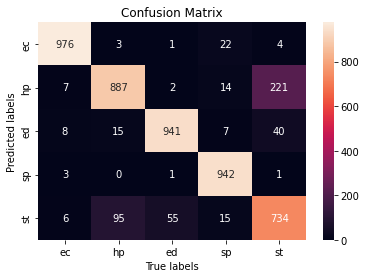

In [ ]:

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(["ec","hp","ed","sp","st"]); ax.yaxis.set_ticklabels(["ec","hp","ed","sp","st"]);

In [ ]:
res = []
for i in range(0,len(X_train)):
    res.append(list(model.predict(X_train["data"].iloc[i]))[0][0].split("__")[-1])

In [ ]:
len(res)

160000

In [ ]:
print(res)

['st', 'sp', 'sp', 'hp', 'hp', 'ec', 'hp', 'hp', 'st', 'hp', 'sp', 'hp', 'ed', 'sp', 'ec', 'sp', 'sp', 'ed', 'ec', 'ec', 'ec', 'ed', 'sp', 'sp', 'st', 'ec', 'ec', 'hp', 'ed', 'sp', 'st', 'ec', 'ed', 'st', 'hp', 'ed', 'st', 'st', 'ed', 'ec', 'st', 'ec', 'sp', 'sp', 'ec', 'ec', 'hp', 'st', 'st', 'ec', 'st', 'st', 'st', 'sp', 'ec', 'hp', 'hp', 'ec', 'ed', 'sp', 'hp', 'hp', 'st', 'hp', 'hp', 'ed', 'st', 'ed', 'ed', 'sp', 'hp', 'hp', 'ec', 'hp', 'ed', 'sp', 'hp', 'sp', 'ec', 'ec', 'st', 'ed', 'st', 'ec', 'ed', 'st', 'ec', 'st', 'hp', 'ec', 'st', 'st', 'hp', 'st', 'st', 'ed', 'ec', 'ed', 'hp', 'ed', 'sp', 'ec', 'sp', 'st', 'hp', 'ed', 'hp', 'st', 'hp', 'hp', 'hp', 'hp', 'sp', 'st', 'ec', 'ed', 'hp', 'hp', 'ed', 'st', 'st', 'st', 'ed', 'ed', 'sp', 'st', 'hp', 'ed', 'sp', 'st', 'ec', 'sp', 'ec', 'ed', 'ed', 'ed', 'st', 'ed', 'hp', 'hp', 'sp', 'sp', 'ec', 'sp', 'sp', 'st', 'hp', 'hp', 'ec', 'hp', 'ec', 'sp', 'st', 'sp', 'st', 'sp', 'sp', 'hp', 'sp', 'sp', 'st', 'hp', 'st', 'sp', 'ec', 'ec', 'st

In [ ]:
accuracy_score(list(y_train),res)

0.98155625

In [ ]:
accuracy_score(list(y_train),res)

0.98155625

In [ ]:
y_pred=labelsToIndex(res)

In [ ]:
y_true =labelsToIndex(list(y_train))

In [ ]:
print(f1_score(y_pred,y_true,average="macro"))
print(f1_score(y_pred,y_true,average="micro"))
print(f1_score(y_pred,y_true,average="weighted"))
print(f1_score(y_pred,y_true,average="samples"))
print(accuracy_score(y_pred,y_true))

0.9815529643572048
0.98155625
0.981559535642795
0.98155625
0.98155625


In [ ]:
res = []
for i in range(0,len(X_valid)):
    res.append(list(model.predict(X_valid["data"].iloc[i]))[0][0].split("__")[-1])

In [ ]:
len(res)

20000

In [ ]:
print(res)

['sp', 'ec', 'ec', 'ec', 'hp', 'ec', 'sp', 'st', 'hp', 'sp', 'hp', 'ec', 'ed', 'ec', 'hp', 'ed', 'hp', 'ec', 'sp', 'st', 'sp', 'hp', 'ed', 'sp', 'hp', 'hp', 'st', 'ec', 'st', 'ec', 'ed', 'hp', 'st', 'ec', 'hp', 'hp', 'sp', 'hp', 'ed', 'hp', 'ed', 'sp', 'st', 'hp', 'sp', 'hp', 'hp', 'ec', 'sp', 'hp', 'sp', 'sp', 'sp', 'hp', 'ec', 'sp', 'hp', 'st', 'sp', 'ed', 'ed', 'st', 'ec', 'sp', 'ed', 'ed', 'ec', 'ed', 'ec', 'sp', 'hp', 'sp', 'st', 'sp', 'st', 'ec', 'sp', 'hp', 'ec', 'hp', 'ed', 'hp', 'ed', 'st', 'st', 'st', 'hp', 'st', 'st', 'ec', 'hp', 'st', 'ec', 'st', 'ed', 'st', 'sp', 'st', 'sp', 'hp', 'ed', 'hp', 'ed', 'ec', 'ed', 'ed', 'ed', 'sp', 'ec', 'hp', 'sp', 'ed', 'ed', 'ec', 'hp', 'sp', 'hp', 'ed', 'sp', 'hp', 'ec', 'ec', 'sp', 'hp', 'sp', 'hp', 'hp', 'ed', 'hp', 'ec', 'ed', 'ec', 'st', 'sp', 'ec', 'ec', 'st', 'hp', 'st', 'hp', 'ec', 'sp', 'ec', 'ed', 'hp', 'st', 'st', 'sp', 'sp', 'st', 'sp', 'st', 'ed', 'sp', 'sp', 'sp', 'hp', 'ed', 'st', 'hp', 'hp', 'ed', 'st', 'sp', 'st', 'hp', 'ed

In [ ]:
accuracy_score(list(y_valid),res)

0.97455

In [ ]:
accuracy_score(list(y_valid),res)

0.97455

In [ ]:
y_pred=labelsToIndex(res)

In [ ]:
y_true =labelsToIndex(list(y_valid))

In [ ]:
print(f1_score(y_pred,y_true,average="macro"))
print(f1_score(y_pred,y_true,average="micro"))
print(f1_score(y_pred,y_true,average="weighted"))
print(f1_score(y_pred,y_true,average="samples"))
print(accuracy_score(y_pred,y_true))

0.9745484815155526
0.97455
0.9745515184844473
0.97455
0.97455
